In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate the dataset
dates = pd.date_range('2023-01-01', periods=900, freq='D')
stores = np.random.choice([1, 2, 3, 4], size=900)  # Random store ID
sales = np.random.randint(100, 1000, size=900)     # Random sales numbers
temperature = np.random.randint(60, 100, size=900) # Random temperature (in Fahrenheit)
holidays = np.random.choice([0, 1], size=900)      # 0 = no holiday, 1 = holiday
promo = np.random.choice([0, 1], size=900)         # 0 = no promotion, 1 = promotion
region = np.random.choice(['North', 'South'], size=900)  # Random regions
weekday = pd.Series(dates).dt.weekday              # Weekday feature (0=Monday, 6=Sunday)

# Create a DataFrame
df = pd.DataFrame({
    'Store ID': stores,
    'Date': dates,
    'Sales': sales,
    'Temperature': temperature,
    'Holiday': holidays,
    'Promo': promo,
    'Region': region,
    'Weekday': weekday
})

# Show the first few rows of the dataset
df


,Store ID,Date,Sales,Temperature,Holiday,Promo,Region,Weekday
0,1,2023-01-01,235,63,0,1,North,6
1,4,2023-01-02,847,68,0,0,South,0
2,2,2023-01-03,146,79,1,0,South,1
3,1,2023-01-04,596,60,0,1,North,2
4,4,2023-01-05,739,80,0,0,North,3
...,...,...,...,...,...,...,...,...
895,2,2025-06-14,887,72,1,1,North,5
896,3,2025-06-15,454,66,0,1,South,6
897,2,2025-06-16,401,69,0,1,South,0
898,3,2025-06-17,200,70,1,0,North,1


In [12]:
df.describe()

,Store ID,Date,Sales,Temperature,Holiday,Promo,Weekday
count,900.000000,900,900.000000,900.000000,900.000000,900.000000,900.000000
mean,2.512222,2024-03-25 11:59:59.999999744,550.122222,79.380000,0.496667,0.507778,2.996667
min,1.000000,2023-01-01 00:00:00,100.000000,60.000000,0.000000,0.000000,0.000000
25%,2.000000,2023-08-13 18:00:00,330.750000,70.000000,0.000000,0.000000,1.000000
50%,2.000000,2024-03-25 12:00:00,549.500000,79.000000,0.000000,1.000000,3.000000
75%,4.000000,2024-11-05 06:00:00,762.000000,89.000000,1.000000,1.000000,5.000000
max,4.000000,2025-06-18 00:00:00,999.000000,99.000000,1.000000,1.000000,6.000000
std,1.127503,NaN,256.206150,11.410241,0.500267,0.500217,2.003054


**Handling Missing Values**

In [17]:
# Check for missing values
print(df.isnull().sum())

Store ID       0
Date           0
Sales          0
Temperature    0
Holiday        0
Promo          0
Region         0
Weekday        0
dtype: int64


**Feature Creation**

In [21]:
# Feature Creation
df['Week_of_Year'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df['Day_since_Holiday'] = df['Date'].apply(lambda x: (pd.to_datetime(x) - pd.to_datetime(df[df['Holiday'] == 1]['Date'].max())).days)
df['Is_Weekend'] = pd.to_datetime(df['Date']).dt.dayofweek >= 5


In [23]:
df.head()

,Store ID,Date,Sales,Temperature,Holiday,Promo,Region,Weekday,Week_of_Year,Day_since_Holiday,Is_Weekend
0,1,2023-01-01,235,63,0,1,North,6,52,-899,True
1,4,2023-01-02,847,68,0,0,South,0,1,-898,False
2,2,2023-01-03,146,79,1,0,South,1,1,-897,False
3,1,2023-01-04,596,60,0,1,North,2,1,-896,False
4,4,2023-01-05,739,80,0,0,North,3,1,-895,False


**Feature Transformation**

In [26]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=['Region'], drop_first=True)
df

,Store ID,Date,Sales,Temperature,Holiday,Promo,Weekday,Week_of_Year,Day_since_Holiday,Is_Weekend,Region_South
0,1,2023-01-01,235,63,0,1,6,52,-899,True,False
1,4,2023-01-02,847,68,0,0,0,1,-898,False,True
2,2,2023-01-03,146,79,1,0,1,1,-897,False,True
3,1,2023-01-04,596,60,0,1,2,1,-896,False,False
4,4,2023-01-05,739,80,0,0,3,1,-895,False,False
...,...,...,...,...,...,...,...,...,...,...,...
895,2,2025-06-14,887,72,1,1,5,24,-4,True,False
896,3,2025-06-15,454,66,0,1,6,24,-3,True,True
897,2,2025-06-16,401,69,0,1,0,25,-2,False,True
898,3,2025-06-17,200,70,1,0,1,25,-1,False,False


**Scaling feature**

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Temperature'] = scaler.fit_transform(df[['Temperature']])


In [31]:
df.head()

,Store ID,Date,Sales,Temperature,Holiday,Promo,Weekday,Week_of_Year,Day_since_Holiday,Is_Weekend,Region_South
0,1,2023-01-01,235,0.076923,0,1,6,52,-899,True,False
1,4,2023-01-02,847,0.205128,0,0,0,1,-898,False,True
2,2,2023-01-03,146,0.487179,1,0,1,1,-897,False,True
3,1,2023-01-04,596,0.000000,0,1,2,1,-896,False,False
4,4,2023-01-05,739,0.512821,0,0,3,1,-895,False,False


**Feature selection**

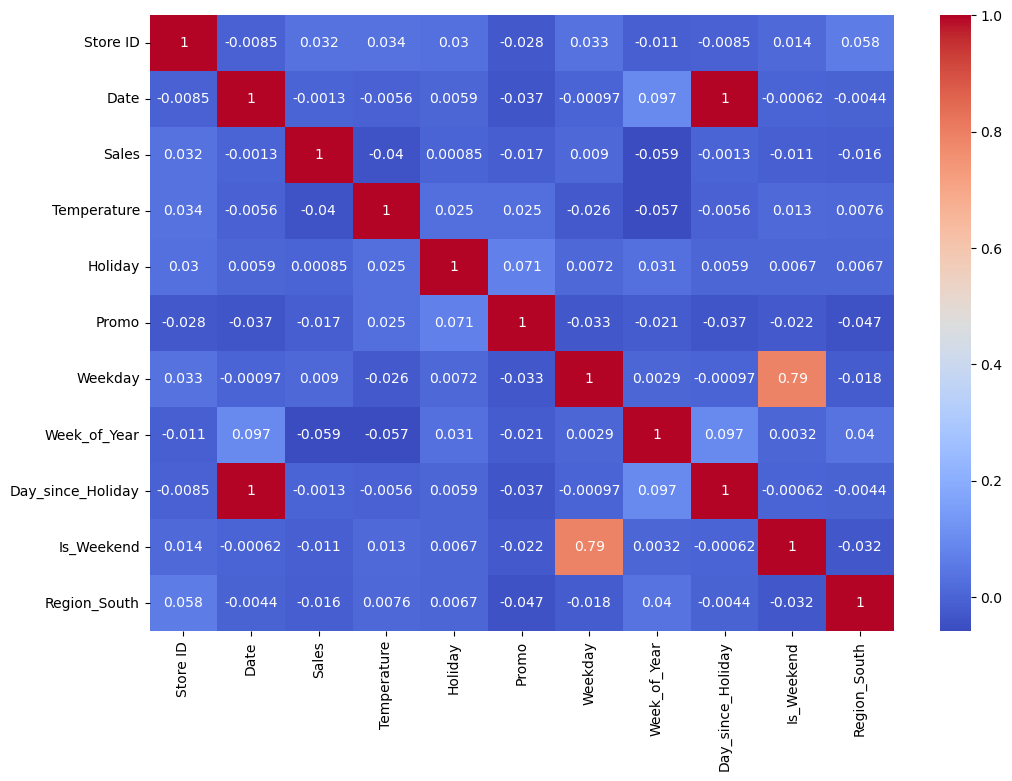

In [34]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


**Model Building**

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Sales', 'Date'])
y = df['Sales']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)


**Model evaluation**

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


R-squared: -0.09020950655999149
